# DRAW GRAPH

In [2]:
import graphviz as gv

In [3]:
def drawGraph(G, path):
    g = gv.Graph("nombre")
    n = len(G)
    done = set()
    for v, u in enumerate(path):
        if u != -1:
            g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
            done.add((u, v))
            done.add((v, u))
    for u in range(n):
        g.node(str(u))
        for v in G[u]:
            if not (u, v) in done:
                done.add((u, v))
                done.add((v, u))
                g.edge(str(u), str(v))
    print(g)

    return g

In [4]:
%%file 1.in
2 3 4
4 5 6
0 4
0 1 7
0 2
1 6 7
1 5
3 5

Overwriting 1.in


# BFS

In [5]:
import numpy as np

In [6]:
def bfs(G, s):
    n = len(G)
    visited = [False] * n
    path = [-1] * n
    queue = [s]
    visited[s] = True

    while queue:
        u = queue.pop(0)
        for v in G[u]:
            if not visited[v]:
                visited[v] = True
                path[v] = u
                queue.append(v)
    return path

In [7]:
with open("1.in") as f:
    G = []
    for line in f:
        G.append([int(x) for x in line.split()])
    for l in G:
        print(l)

[2, 3, 4]
[4, 5, 6]
[0, 4]
[0, 1, 7]
[0, 2]
[1, 6, 7]
[1, 5]
[3, 5]


In [8]:
path = bfs(G,4)
path

[4, 3, 4, 0, -1, 1, 1, 3]

graph nombre {
	4 -- 0 [color=orange dir=forward penwidth=2]
	3 -- 1 [color=orange dir=forward penwidth=2]
	4 -- 2 [color=orange dir=forward penwidth=2]
	0 -- 3 [color=orange dir=forward penwidth=2]
	1 -- 5 [color=orange dir=forward penwidth=2]
	1 -- 6 [color=orange dir=forward penwidth=2]
	3 -- 7 [color=orange dir=forward penwidth=2]
	0
	0 -- 2
	1
	1 -- 4
	2
	3
	4
	5
	5 -- 6
	5 -- 7
	6
	7
}



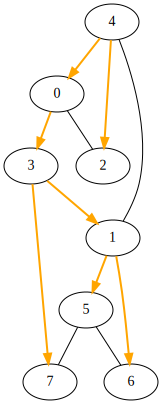

In [9]:
drawGraph(G,path)

# DFS

In [10]:
def dfs(G, s):
    n = len(G)
    visited = [False] * n
    parent = [-1] * n

    def _dfs(u):
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                parent[v] = u
                _dfs(v)

    _dfs(s)

    return parent

In [11]:
path=dfs(G,4)
print(path)


[4, 3, 0, 0, -1, 1, 5, 5]


graph nombre {
	4 -- 0 [color=orange dir=forward penwidth=2]
	3 -- 1 [color=orange dir=forward penwidth=2]
	0 -- 2 [color=orange dir=forward penwidth=2]
	0 -- 3 [color=orange dir=forward penwidth=2]
	1 -- 5 [color=orange dir=forward penwidth=2]
	5 -- 6 [color=orange dir=forward penwidth=2]
	5 -- 7 [color=orange dir=forward penwidth=2]
	0
	1
	1 -- 4
	1 -- 6
	2
	2 -- 4
	3
	3 -- 7
	4
	5
	6
	7
}



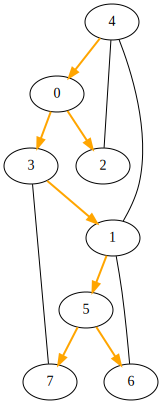

In [12]:
drawGraph(G,path)